# Activation: Basic Approach


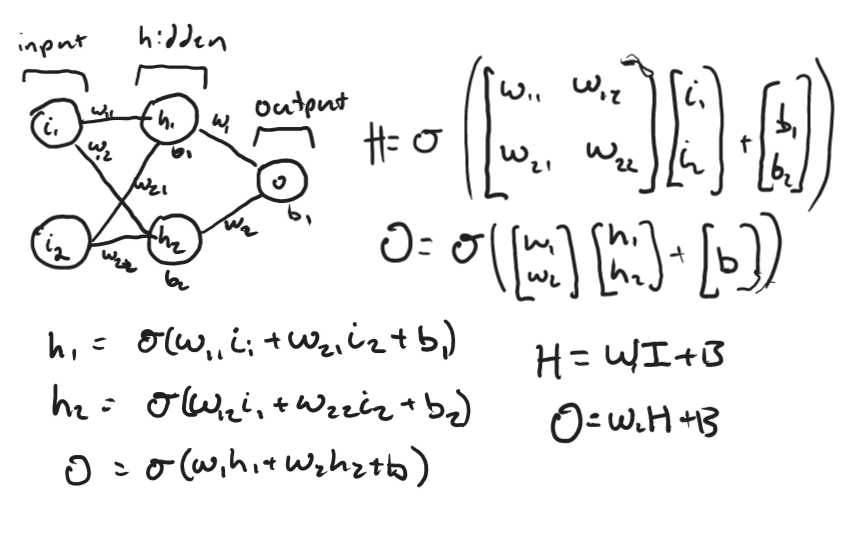

In [ ]:
import numpy as np

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [ ]:
weights = [0.1, 0.6, 0.9, 1, 0.1, 1]
bias = 0

inputs = [[1,0],[0,1],[1,1]]

In [ ]:
for input in inputs:
  i1 = input[0]
  i2 = input[1]

  h1 = i1 * weights[0] + i2 * weights[1] + bias
  h1 = sigmoid(h1)

  h2 = i1*weights[2] + i2*weights[3] + 0
  h2 = sigmoid(h2)

  output = h1*weights[4] + h2*weights[5] + bias
  output = sigmoid(output)

  print(f"Output for inputs {input}: {output}")

Output for inputs [1, 0]: 0.6821017378863259
Output for inputs [0, 1]: 0.6890376797993403
Output for inputs [1, 1]: 0.7184346752219324


# Activation: Matrix Multiplication Approach

In [ ]:
w1 = np.array([[0.1, 0.6], [0.9, 1.0]]).T
w2 = np.array([0.1, 1.0]).T
bias = 0

inputs = np.array([[1, 0], [0, 1], [1, 1]])

In [ ]:
for input in inputs:
  hidden = sigmoid(input @ w1)
  output = sigmoid(hidden @ w2)

  print(f"Output for inputs {input}: {output}")

Output for inputs [1 0]: 0.6821017378863259
Output for inputs [0 1]: 0.6890376797993403
Output for inputs [1 1]: 0.7184346752219324


# Better Extensibility: Class Based Approach

In [ ]:
class NerualNetwork1:

  def __init__(self):
    self.W1 = np.array(np.random.randn(2,2))
    self.W2 = np.array(np.random.randn(2,1))
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,1))

  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))

  def forward(self, input):
    hidden = self.sigmoid(input @ self.W1 + self.B1)
    output = self.sigmoid(hidden @ self.W1 + self.B2)
    return output

In [ ]:
nn = NerualNetwork1()
input = np.array([1,0])
output = nn.forward(input)

output

array([[0.41734682, 0.3504123 ]])

# Robust Approach

In [ ]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def relu(x):
  return x * (x > 0)

In [ ]:
class Layer:
  def __init__(self, input_neurons, output_neurons):
    self.weights = np.random.randn(input_neurons, output_neurons)
    self.bias = np.zeros((1, output_neurons))
    self.activations = {'sigmoid': sigmoid, 'relu': relu}

  def forward(self, input, activation):
    return self.activations[activation](input @ self.weights + self.bias)

In [ ]:
class NeuralNetwork2:
  def __init__(self, input_neurons, hidden_neurons, layer_count, output_neurons=1):
    
    self.input_size = input_neurons
    
    # ensure there is at least an input layer and an output layer
    assert  layer_count >= 0 and \
            input_neurons >= 1 and \
            output_neurons >= 1

    # Input Layer
    self.layers = [Layer(input_neurons, hidden_neurons)]

    # Hidden Layers
    for _ in range(layer_count - 2):
      self.layers.append(Layer(hidden_neurons, hidden_neurons))

    # Ouptut Layer
    self.layers.append(Layer(hidden_neurons, output_neurons))


  def forward(self, input, activation = 'sigmoid'):
    assert input.shape[0] == self.input_size

    for layer in self.layers:
      input = layer.forward(input, activation)

    return input

In [ ]:
nn = NeuralNetwork2(2, 6, 4, 1)

# inputs
X = np.array(([0,0], [0,1], [1,0], [1,1]))
# expected outputs
Y = np.array([0,1,1,0])

for i, x in enumerate(X):
  output = nn.forward(x)
  print(f"Model predicted: {output} | Actual Value: {Y[i]}")

Model predicted: [[0.38327467]] | Actual Value: 0
Model predicted: [[0.37286239]] | Actual Value: 1
Model predicted: [[0.39975149]] | Actual Value: 1
Model predicted: [[0.38700718]] | Actual Value: 0
